## Deterministic 

SIR models stand for susceptible, infected, and recovered models. 
SIR stands for . 

Models are based on the following differential equations.

$\quad$

### Susceptible Population 
Defined by $S$, is the population that can be infected. 
It is modelled with the following differential equation: 

$ \frac{ \partial S}{\partial t} = -\rho S I $

What this means is, there is an infected population $I$ which transmits or infects the population $S$, if $\rho$ is equal to $1$ then it means for every infected person, they infect a new person, which means the susceptible population decreases by 1. 

$ \rho$ is called the transmission rate or infection rate. 

### Infected Population 
Defined by $I$, and is the population of infected indivudals. It is modelled with the following differential equation: 


$ \frac{ \partial I}{\partial t} = \rho S I - \gamma I $

What $\gamma$ is, is the recovery rate. 



### Recovered Population
Defined by $R$, and is modelled with 

$ \frac{\partial R}{\partial t} = \gamma I$



### Summary 

The total population is $S + I + R $, you will notice that the change in population is 

$$ \frac{\partial S}{\partial t} + \frac{\partial I}{\partial t} + \frac{\partial R}{\partial t} = 0$$ 

In [70]:
import numpy as np 

In [110]:
# the first thing we are going to do , 
# we are going to create a linear space in time with 1000 steps. 

def create_t():
    return(np.linspace(0,100,1000))

In [111]:
t = create_t()

In [112]:
# we are going to start our populations as the following 

S = np.array([499375])
I = np.array([625])
R = np.array([0])



In [113]:
# lets calculate our h value 
h = t[1] - t[0]

In [114]:
# write our differential equations 
def dS_dt(rho,S_i,I_i):
    return(-rho*S_i*I_i)

def dI_dt(rho,gamma,S_i,I_i):
    return(rho*S_i*I_i - gamma*I_i)

def dR_dt(gamma,I_i):
    return(gamma*I_i)

In [115]:
# now we need to code up our euler's method 
rho = 0.001
gamma = 1


for i in range(0,len(t)):
        # old values
        S_now = S[i]
        I_now = I[i]
        R_now = R[i]
        # new values
        print(S_now,I_now,R_now)
        S_new = S_now + h*dS_dt(rho,S_now,I_now)
        I_new = I_now + h*dI_dt(rho,gamma,S_now,I_now)
        R_new = R_now + h*dR_dt(gamma,I_now)
        
        if S_new < 1:
            S_new = 0.0
        if I_new < 1:
            I_new = 0.0
        # append values 
        S = np.append(S,S_new)
        I = np.append(I,I_new)
        R = np.append(R,R_new)
        if I_new < 1:
            break 
        

499375 625 0
468132.8203203203 31804.61711711712 62.56256256256257
0.0 1518989.8516643501 3246.2079196313434
0.0 1366938.8154617124 155297.244122269
0.0 1230108.1032032827 292127.9563806987
0.0 1106974.1589386899 415261.90064529155
0.0 996165.9348207029 526070.1247632785
0.0 896449.6250288407 625786.4345551407
0.0 806714.9278287566 715521.1317552249
0.0 725962.682800853 796273.3767831285
0.0 653293.7455835504 868942.3140004311
0.0 587898.9762558677 934337.0833281138
0.0 529050.229883909 993185.8297000725
0.0 476092.2489145487 1046143.8106694327
0.0 428435.3671413206 1093800.692442661
0.0 385548.94400405127 1136687.1155799301
0.0 346955.4561157579 1175280.6034682235
0.0 312225.18022829463 1210010.8793556867
0.0 280971.4084336705 1241264.6511503109
0.0 252846.142324194 1269389.9172597874
0.0 227536.218167618 1294699.8414163634
0.0 204759.81995264124 1317476.2396313401
0.0 184263.34147890337 1337972.718105078
0.0 165818.56255208622 1356417.4970318952
0.0 149220.1078421677 1373015.95174181

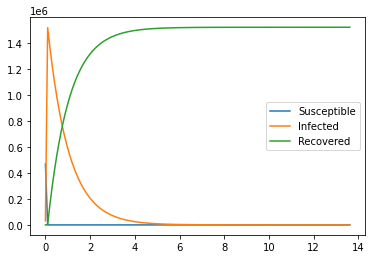

In [116]:
# we are going to plot this stuff 

import matplotlib.pyplot as pyplot 


pyplot.plot(t[0:(len(S)-1)],S[1:], label = "Susceptible")
pyplot.plot(t[0:(len(S)-1)],I[1:], label = "Infected")
pyplot.plot(t[0:(len(S)-1)],R[1:], label = "Recovered")
pyplot.legend()



In [143]:
def SIR_model(S_start,I_start,rho,gamma,num_steps):
    # linear space
    t = np.linspace(0,100,num_steps)
    
    # now we need to code up our euler's method 

    # lets calculate our h value 
    h = t[1] - t[0]
    
    S = np.array([S_start])
    I = np.array([I_start])
    R = np.array([0])

    for i in range(0,len(t)):
            # old values
            S_now = S[i]
            I_now = I[i]
            R_now = R[i]
            # new values
            S_new = S_now + h*dS_dt(rho,S_now,I_now)
            I_new = I_now + h*dI_dt(rho,gamma,S_now,I_now)
            R_new = R_now + h*dR_dt(gamma,I_now)

            if S_new < 1:
                S_new = 0.0
            if I_new < 1:
                I_new = 0.0
            # append values 
            S = np.append(S,S_new)
            I = np.append(I,I_new)
            R = np.append(R,R_new)
            if I_new < 1:
                break 

    # we are going to plot this stuff 

    import matplotlib.pyplot as pyplot 


    pyplot.plot(t[0:(len(S)-1)],S[1:], label = "Susceptible")
    pyplot.plot(t[0:(len(S)-1)],I[1:], label = "Infected")
    pyplot.plot(t[0:(len(S)-1)],R[1:], label = "Recovered")
    pyplot.plot(t[0:(len(S)-1)],[100]*(len(S)-1) ,label = 'Hospital Capacity')
    pyplot.legend()



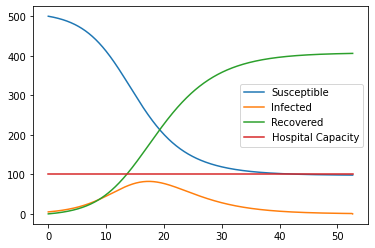

In [144]:
SIR_model(S_start = 500,I_start =5, rho = 0.001,gamma = 0.25,num_steps = 1000)

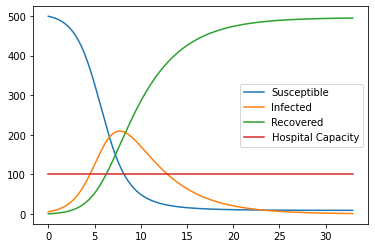

In [145]:
SIR_model(S_start = 500,I_start =5, rho = 0.002,gamma = 0.25,num_steps = 1000)

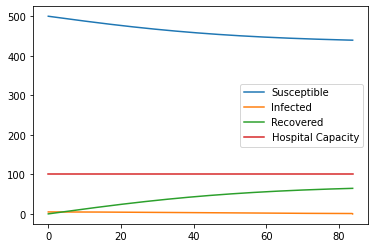

In [147]:
SIR_model(S_start = 500,I_start =5, rho = 0.0005,gamma = 0.25,num_steps = 1000)